In [10]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

wrapper = []
with open('GLT_filtered.csv') as f:
    next(csv.reader(f))
    for row in csv.reader(f):
        if not row:
            continue
        temp = []
        for item in row:
            try:
                temp.append(float(item))
            except ValueError:
                temp.append(item)
        wrapper.append(temp)

In [11]:
def mean(x, y):
    return float((x + y) / 2)


for i in range(len(wrapper)):
    row = wrapper[i]
    if not row[1]:
        j = i + 1
        try:
            while not wrapper[j][1]:
                j += 1
            y = wrapper[j][1]
        except IndexError:
            y = 0
        if i == 0: x = 0
        else:
            x = wrapper[i - 1][1]
        wrapper[i][1] = mean(x, y)

In [12]:
def find_top(city, N):
    l = list(filter(lambda item: item[3] == city ,sorted(wrapper, key=lambda x: x[1], reverse=True)))
    return l[:N], l[-N:]

hottest, coldest = find_top('Abidjan', 3)
hottest, coldest

([['1998-03-01', 29.923, 0.537, 'Abidjan', "CÃ´te D'Ivoire", '5.63N', '3.23W'],
  ['2010-03-01', 29.596, 0.555, 'Abidjan', "CÃ´te D'Ivoire", '5.63N', '3.23W'],
  ['1998-02-01',
   29.477,
   0.152,
   'Abidjan',
   "CÃ´te D'Ivoire",
   '5.63N',
   '3.23W']],
 [['1887-08-01', 22.528, 0.836, 'Abidjan', "CÃ´te D'Ivoire", '5.63N', '3.23W'],
  ['1891-08-01', 22.377, 0.715, 'Abidjan', "CÃ´te D'Ivoire", '5.63N', '3.23W'],
  ['1890-08-01',
   22.363000000000003,
   0.9420000000000001,
   'Abidjan',
   "CÃ´te D'Ivoire",
   '5.63N',
   '3.23W']])

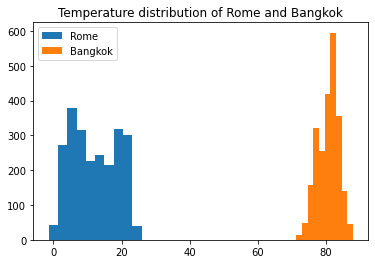

In [13]:
rome_distribution = list(map(lambda x: x[1], (filter(lambda x: x[3] == 'Rome', wrapper))))
bangkok_distribution = list(map(lambda x: x[1], (filter(lambda x: x[3] == 'Bangkok', wrapper))))

plt.hist(rome_distribution, label='Rome')
plt.hist(bangkok_distribution, label='Bangkok')
plt.title('Temperature distribution of Rome and Bangkok')
plt.legend()
plt.show()

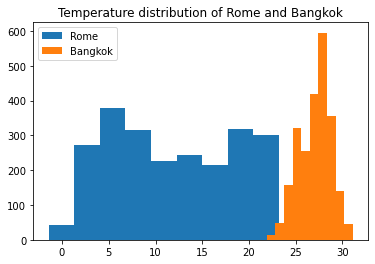

In [14]:
bangkok_distribution = list(map(lambda x: (x - 32) / 1.8, bangkok_distribution))

plt.hist(rome_distribution, label='Rome')
plt.hist(bangkok_distribution, label='Bangkok')
plt.title('Temperature distribution of Rome and Bangkok')
plt.legend()
plt.show()